In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np

In [2]:
sbn.set()

# Comentarios iniciales

Primero me gustaría hacer una **gran advertencia**: 
> Este notebook y todos los que vienen estarán escritos de en la misma manera en la que doy mis clases, con un tono informal, sin asumir que hay una voz universal y máxima de conocimiento. Si notas errores puedes comentarlos y si te animas puedes colaborar a corregirlos.
Nunca me he sentido cómodo de aprender de las grandes e inalcanzables mentes, existen y está bien pero simplemente no me siento cómodo y por eso mismo incluso hago estos notebooks. El conocimiento no debería de quedarse limitado a aulas y los y las catedráticas no deberían de ser los y las únicas poseedoras del conocimiento, en cambio, creo que lo podemos sino democratizar sí facilitar.  

Adicional a lo anterior voy a asumir que tienes conocimientos en lo que yo llamo _python para sistemas_: conocimiento de iteradores, numpy y matplotlib o seaborn. A esto le llaman también cómputo númerico pero yo así le puse a mi tutorial; si quieres darle una repasada a tu python puede encontrar también un breve taller/curso, o cual sea el nombre que le podamos dar: [python para sistemas](https://github.com/uncrayon/python-para-sistemas). 

Por último, Daniel Shiffman (The Coding Traing) resuelve casi todos los problemas usando processing y p5.js. Processing está sobre java mientras que p5.js es un _framework_ de javascript. Aquí vamos a usar python y esto es porque python es súper fácil de leer y además la gran mayoría de personas que tengo cercanas tienen nociones del mismo (así también estoy considerando hacer un fork en R). 

Pasando los tres puntos anteriores ahora sí, vamos al problema. 

_Si existe alguna forma de hacer posdata en un texto esto es eso: Adicional a las notas anteriores me gustaría decir que muchas veces escribiendo no soy tan elocuente como lo podría ser hablando y viceversa entonces cualquier duda échala por aquí o a mi correo y la checamos en conjunto. Preferiría que la pusieras acá porque además así queda registro para que otras personas puedan acceder a la discusión y quede como banco de dudas_

# El oscilador armónico

Antes de hablar del péndulo me gustaría que platicaramos del oscilador armónico. 

Supón que hay una masa atada a un resorte y este está fijo a una pared.

![oscilador_1](./img/oscilador_1.png)

Supón también que cuando el oscilador está en reposo en una posición que llamaremos $x_0$ y para simplificar la vida diremos que $x_{0} = 0$. Hasta ahora el problema está en una dimensión entonces no se tiene que incluir notación vectorial: ni negritas, ni flechas. Análisis rápido ¿Por qué está en una dimensión? No hay _niguna fuerza_ actuando en la componente $y$ o en la componente $z$ y por ello se puede reducir la expresión al eje $x$ entonces las ecuaciones que antes eran vectoriales se reducen a expresiones escalares, más adelante hay problemas 3D.   

Hasta ahora no hay ecuaciones, la masa está estática y el resorte en reposo. Por el bien del tutorial jalo la masa, la llevo a una posición $x_{1}$ y la suelto

![oscilador_2](./img/oscilador_2.png)

Y momentos después alcanza la posición $x_{2}$. Como no hay fricción no hay disipación de energía entonces la masa y el resorte se quedarán haciendo se movimiento hasta que alguien interfiera de alguna manera. Claramente la mécanica ideal se escapa de las leyes de la termodinámica. 

El fenómeno de jalar la masa y que esta vaya y venga se llama _oscilación_ y la cantidad de veces que pasa por el punto $x_1$ (o el $x_2$ o el $x_0$) en un segundo se le llama _frecuencia_. Al tiempo en que tarda en regresar la masa al punto $x_1$ partiendo del punto $x_{1}$ se llama periodo y todas estas medidas nos caracteristicas de un péndulo y nos ayudan a describirlo. Si bien medir esas cantidades ayuda a describir este oscilador no ayuda a describir ni predecir cualqueir otro oscilador por ello se necesita hacer una _generalización_, esto es aprender a describir bien al sistema e incluso predecirlo. 

Para lo anterior partamos de la [ley de Hooke](https://es.wikipedia.org/wiki/Ley_de_elasticidad_de_Hooke). Es posible escribirla (bajo la convención adecuada) como la siguiente _fuerza restaurativa_ (restaurativa porque tiene un menos):

$$
 F_{s} = - k x
$$

Donde $F_{s}$ es la fuerza que ejerce el resorte sobre la masa. Notemos que la fuerza crece entre más lejos este del punto de reposo la masa.   

Vamos a analizar un poco la situación. Si $x=0$ entonces $F_{s}(x=0) = 0$, es decir, está en reposo la masa ya que el resorte no ejece ninguna fuerza sobre ella. Si $x>0$ entonces $F_{s}(x)<0$ y esto quiere decir que el resorte _está jalando_ a la masa su punto de reposo, mientras que si $x<0$ entonces $F_{s}(x)>0$ lo que quiere decir que el resorte _está empujando_ a la masa al punto de reposo. 

Pasado lo anterior es momento de llamar, como en todo problema de mécanica, a la segunda ley de Newton:

$$
F = ma
$$

Ahora, lo anterior se puede formular también en términos de una segunda derivada:

$$
F = m a = m \frac{d^{2}x}{dt^{2}}
$$

Siguiendo la segunda de Newton tenemos que la fuerza en que el resorte aplica sobre la caja es describible también en términos de su aceleración y masa de tal suerte que:

$$
 m \frac{d^{2}x}{dt^{2}} = -k x
$$

Y así llegamos a una ecuación diferencial ordinaria de segundo orden, si resolvemos la ecuación entonces encontramos un forma de describir y predecir el comportamiento de cualquier resorte. Esta ecuación es resoluble analíticamente sin embargo la gran basta cantidad de ecuaciones que encontraremos en la realidad no lo son y tendremos que recurrir a los métodos númericos, para avanzar vamos a visitar al más sencillo de todos ellos: el método de Euler. 

## Método de Euler 

Para comenzar a hablar de este método númerico de solución de ecuaciones diferenciales ordinarias primero debemos de hablar de EDOs (Ecuaciones diferenciales ordinarias, ODEs en inglés). 

Cualquier ecuación diferencial ordinaria de primer orden se puede escribir como sigue:

$$
\frac{dy}{dt}= y' = f(y,t)
$$

Donde a $f(y,t)$ se le llama la _función pendiente_ (aquí vale la pena mencionar que la aproximación geométrica a la derivada es a través de la secante cuando tiende a la pendiente). 

Ahora bien, es de notar que la definición formal de la derivada de una función $y(t)$ se puede expersar como sigue:

$$
\frac{dy}{dt} = \lim_{h \to 0} \frac{y(t+h) - y(t)}{h}
$$

_de manera informal_ se puede tomar $h\approx 0$ y entonces lo anterior se puede escribir como:

$$
\frac{dy}{dt} \approx \frac{y(t+h) - g(t)}{h}
$$

Si se sigue bajo el supuesto de $h\approx 0$ entonces se puede _aproximadamente decir_ que:

$$
\frac{y(t+h) - y(t)}{h} \approx f(y,t)
$$

Con lo cual tienes que:

$$
y(t+h) \approx hf(y,t) + y(t)
$$

En algunos libros y artículos escriben la relación anterior como:

$$
y(t+\Delta t) \approx \Delta t f(y,t) + y(t)
$$

Aquí me voy a referir a este sistema con notación de subíndices abusando de la discretización:

$$
y_{n+1} = hf(y_{n},t_{n}) + y_{n}
$$

Nota que para resolver esta ecuación se necesita partir de un $y_{0} = y(t_{0})$, a este punto se le llama _condición inicial_. 
> **Nota Primera**: Necesitamos el punto $y_{0}$ porque si hacemos $n=0$ entonces $y_{1} = hf(y_{0},t_{0}) + y_{0}$. Entonce para calcular $y_{1}$ necesitamos el $y_{0}$, para el $y_{2}$ el $y_{1}$ y así sucesivamente.

> **Nota Segunda**: Al sistema presentado se le llama sistema de Euler-Cromer o _Euler hacia adelante_, lo cual no significa que a partir de una condición inical no se pueda ir hacia el pasado. Simplemente el sistema de índices es conveniente para tratar el problema hacia el futuro. Así pues es posible calcular $y_{-1}$ aunque se recomienda evitar usar el mismo sistema índicial para asumir confusión. 

## Un primer ejemplo al método de Euler.

Quizás el primer problema que siempre se presenta en de EDOs es o bien un decaímiento nuclear o un decaímiento de bacterias en un cultivo por antibióticos. Sin importar el ejemplo el sistema de EDOs es el mismo:

$$
\frac{dy}{dt} = -ky
$$

Donde $k$ es la _constante de decaímiento_ y $y(t)$ es la población al tiempo $t$.

La solución analítica de este problema es:
$$
y(t) = y_{0} e^{-kt}
$$

Pero esta vez lo que se busca no es comprobar la solución analítica sino resolver el problema de manera númerica. Para esto se supondrá que $k=0.1$ y $y_{0} = 1000$ y con esto eñ sistema númerico, tomando $h=0.01$, es entonces el siguiente:

$$
y_{n+1} = 0.01 (-0.1*y_{n}) + y_{n}
$$

Como ya está definida la condición inicial, la constante de decaímiento y el tamaño del paso ($h$) entonces ya es posible realizar la simulación. Ahora bien, se debe que incluir una condición de alto pues de no hacerlo el sistema iterará al infinito, se llenará la memoria RAM y se llorará al computador.

In [3]:
def euler_decaimiento(y0,t0=0,k=-0.1,t_max=50,dt=0.01):
    """
    Esta función realiza la integración númerica de una ecuación del tipo
    y'=-ky
    
    Params
    ---------
    y0 : float,int
        Condición inicial del problema
    
    t0  : float, int
        Tiempo en el que inicia el sistema, corresponde a la condición
        inicial
        
    k : float
        Constante de decaímiento del sistema
    
    t_max : float, int
        Tiempo máximo para simulación, o bien se queda por debajo o bien
        se alcanza.
    
    dt : float
        También denotado como h. Es el tamaño de paso que vamos a relizar
        por el campo de pendientes o bien el tamaño de paso que vamos a dar
        en el tiempo.
    """
    Y,T = [y0],[t0]
    t = t0
    i = 0
    while t<=t_max:
        Y.append(dt*k*Y[i]+Y[i])
        T.append(T[i]+dt)
        t = t+dt
        i = i+1
    return Y,T

Ya con la función vamos a compara la solución analítica contra la númerica para un $t_{max}=50$

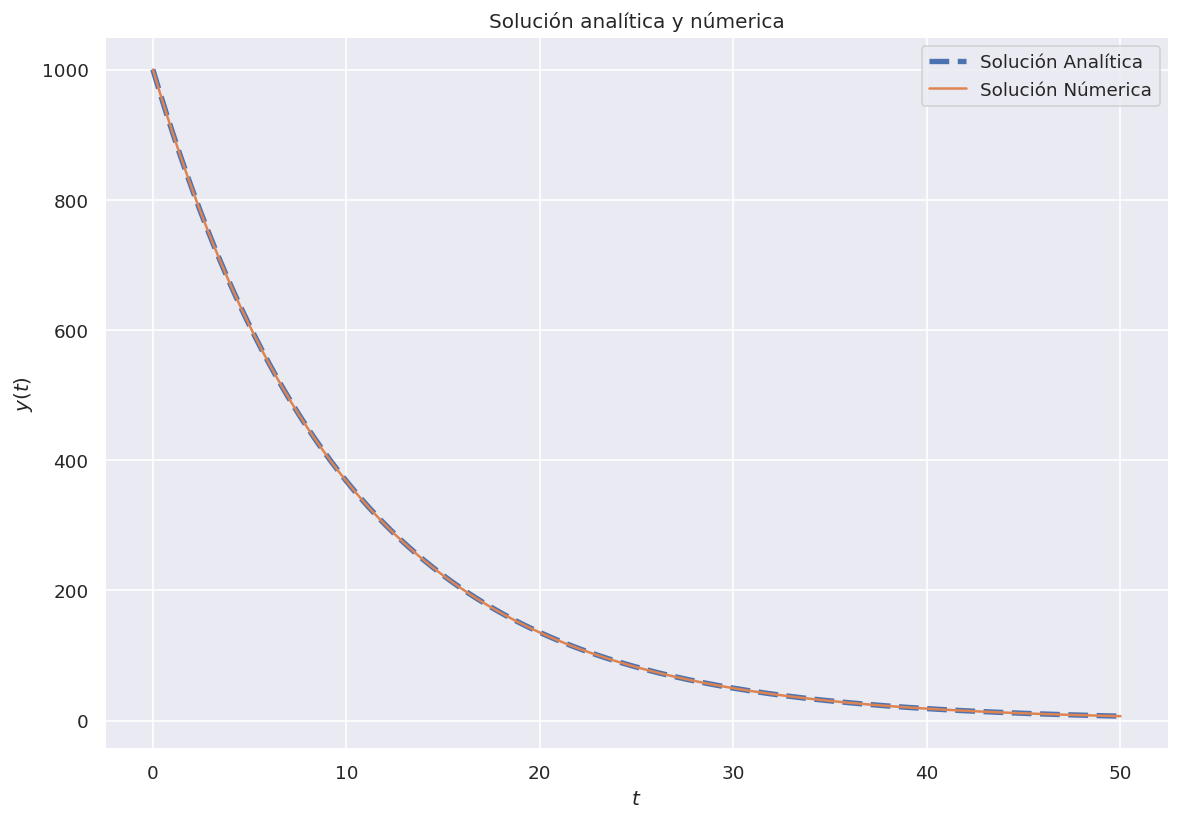

In [4]:
fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=120)

# Aquí calculamos la solución analítica
t = np.linspace(0,50,1000)
f = lambda t:1000*np.exp(-t*0.1)
y = f(t)

# Aquí calculamos la solución númerica
Y,T = euler_decaimiento(y0=1000)

ax.plot(t,y,label='Solución Analítica',ls='--',lw=3.2)
ax.plot(T,Y,label='Solución Númerica')

ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución analítica y númerica')
ax.legend()

fig.tight_layout()
plt.show()

Es de notar que la solución analítica y númerica parecen ser casi la misma. Vamos qué pasa si hacemos variar el parámetro $h$.

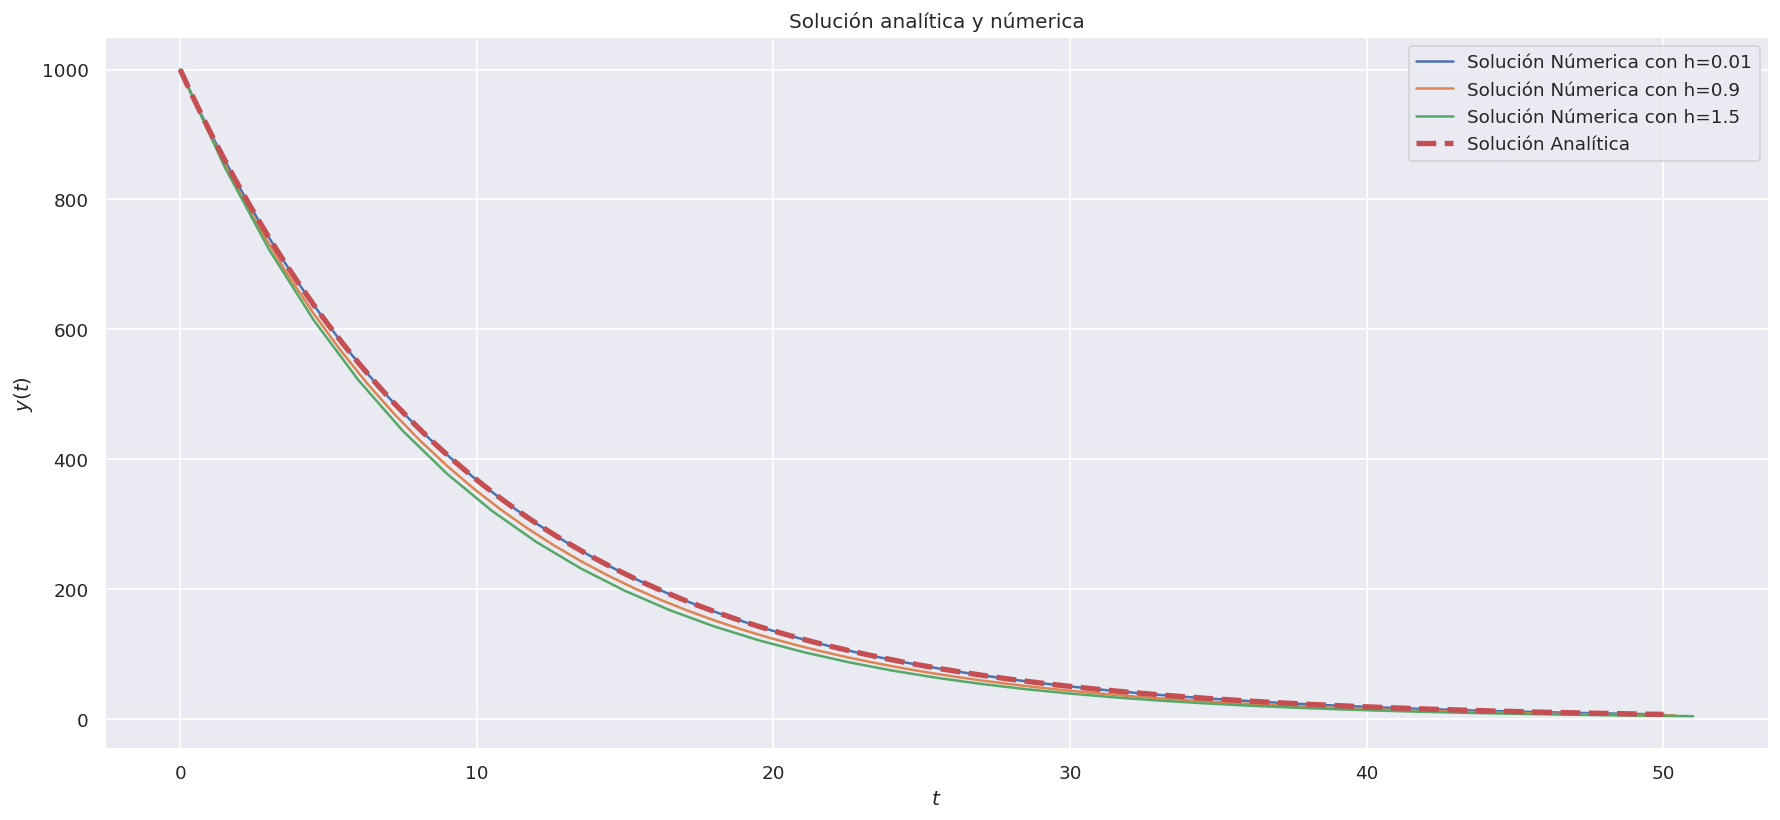

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)

# Aquí calculamos la solución analítica
t = np.linspace(0,50,1000)
f = lambda t:1000*np.exp(-t*0.1)
y = f(t)

# Aquí calculamos la solución númerica
for h in [0.01,0.9,1.5]:
    Y,T = euler_decaimiento(y0=1000,dt=h)
    ax.plot(T,Y,label='Solución Númerica con h={}'.format(h))
ax.plot(t,y,label='Solución Analítica',ls='--',lw=3.2)


ax.set_ylabel(r'$y(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución analítica y númerica')
ax.legend()

fig.tight_layout()
plt.show()

Conforme crece el valor del tamaño de paso $h$ las soluciones númericas se desvían de la solución original, a esto se le llama _el error del método_ y éste se crece como $\epsilon\sim h^{2}$

## Un segundo ejemplo al método de Euler: crecimiento logístico

El segundo ejemplo que se puede dar en ecuaciones diferenciales y que además es bien útil para poder definir y comenzar a estudiar estabilidad es el crecimiento lógistico. 

En este problema se puede considerar una población con recursos limitados. Puede ser su comida o el espacio, es igual. Lo importante de este sistema es que tiene dos puntos de fijos uno estable y otro inestable. Dicho sistema es gobernado por la siguiente ecuación:

$$
\frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) 
$$

Donde $P$ es la población al tiempo $t$, $r$ es la constante de crecimiento (i.e. qué tan rápido crece la población) y $K$ es la capacidad de carga del sistema (cantidad máxima de población). Una nota importante es que como estamos en el terreno de las ecuaciones diferenciales entonces nuestras cantidades deben ser continuas ya que el tiempo es un continuo también; para asergurar la correcta solución de problema debemos de poder asegurar que al menos en un intervalo $[a,b]$ la función es diferenciable. 

Ahora bien, por definición los puntos fijos son aquellos que cuando nos paremos en ellos la función no variará en el tiempo, es decir, la derivada se anulará:
> **Def.** Se dice que si tenemos un sistema $y' = f(y,t)$ entonces $x$ es un **punto fijo** si y solamente si $\left. \frac{dy}{dt}\right|_{y=x} = 0$ o lo que es lo mismo $f(y=x,t) = 0$

Vamos a encontar los puntos fijos de la ecuación logística. Para esto vamos a comenzar igualando la función pendiente a cero:
$$
f(P*,t) = rP⁺\left(1 - \frac{P*}{K}\right) = 0
$$

Es de notar que la ecuación se cumple si $P=0$ pero que tambien se cumple cuando $P=K$. 

$$
Si \; P*=0 \; entonces\; f(0,t) = r0\left(1 - \frac{0}{K}\right) = 0 \\
\\
Si \; P*=K \; entonces\; f(K,t) = rK\left(1 - \frac{K}{K}\right) = rK\left(1 - 1\right) = 0
$$

Esto quiere decir que si mi condición inicial $P_{0} = 0$ o $P_{0} = K$ entonces el sistema se quedará ahí para siempre. Para comprobarlo vamos a postular una solución númerica al problema anterior. Siguendo lo presentado para el método de Euler nuestro sistema de ecuaciones sería el siguiente:
$$
P_{n+1} = hrP_{n}\left(1 - \frac{P_{n}}{K}\right) + P_{n}
\\
t_{n+1} = t_{n} + h
$$

Consideremos para el problema $K=10$ y $r=0.1$ además de las condiciones iniciales $P_{0} = 0$, $P_{0} = 10$ y $P_{0} = 0.1$. Además consideremos un $t_{max}=50$ y un $h=0.001$

In [6]:
def euler_logistico(y0,t0=0,r=0.1,K=10,t_max=50,dt=0.001):
    """
    Esta función realiza la integración númerica de una ecuación del tipo
    P'=rP(1-P/K)
    
    Params
    ---------
    y0 : float,int
        Condición inicial del problema
    
    t0  : float, int
        Tiempo en el que inicia el sistema, corresponde a la condición
        inicial
        
    k : float
        Constante de decaímiento del sistema
    
    t_max : float, int
        Tiempo máximo para simulación, o bien se queda por debajo o bien
        se alcanza.
    
    dt : float
        También denotado como h. Es el tamaño de paso que vamos a relizar
        por el campo de pendientes o bien el tamaño de paso que vamos a dar
        en el tiempo.
    """
    Y,T = [y0],[t0]
    t = t0
    i = 0
    while t<=t_max:
        Y.append(dt*r*Y[i]*(1-(Y[i]/K))+Y[i])
        T.append(T[i]+dt)
        t = t+dt
        i = i+1
    return Y,T

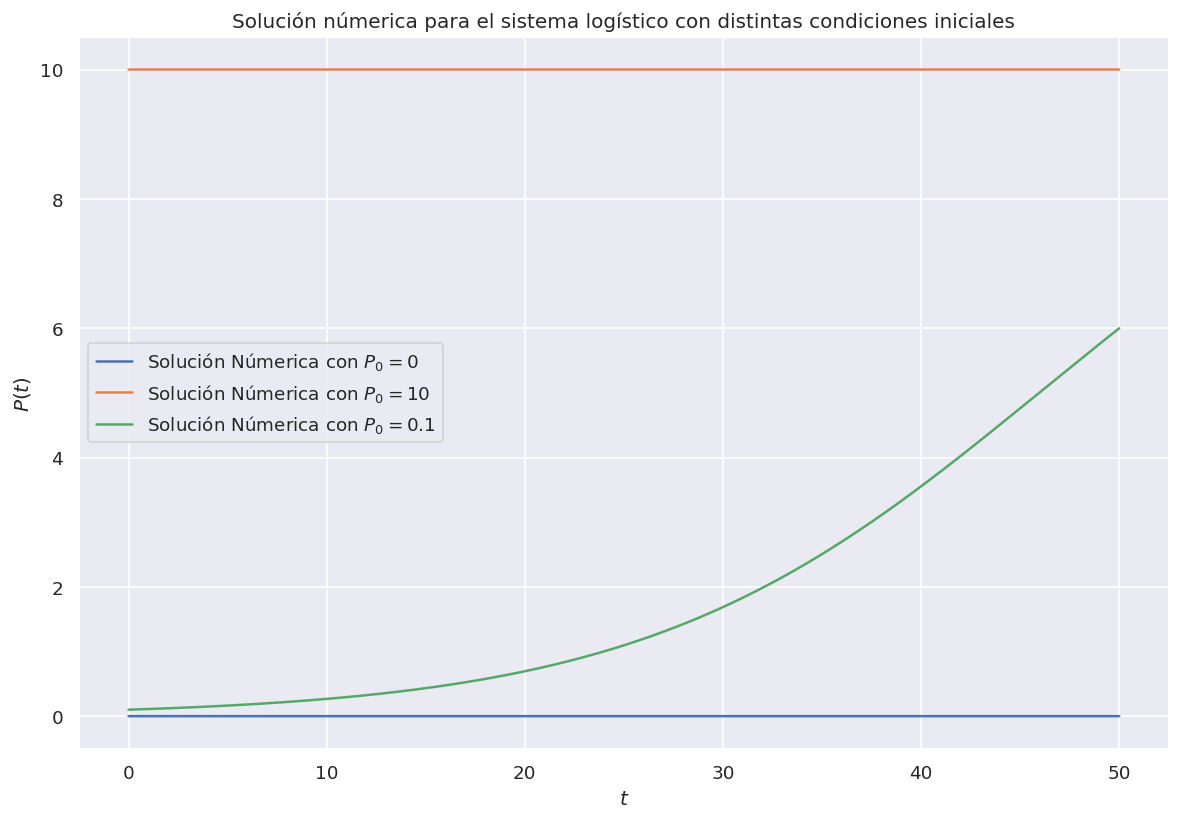

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=120)

# Aquí calculamos la solución númerica

for p0 in [0,10,0.1]:
    Y,T = euler_logistico(y0=p0)
    ax.plot(T,Y,label=r'Solución Númerica con $P_{0}=$'+str(p0))

ax.set_ylabel(r'$P(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución númerica para el sistema logístico con distintas condiciones iniciales')
ax.legend()

fig.tight_layout()
plt.show()

Es de notar que las soluciones para $P_{0}=0$ y $P_{0}=10$ son constantes en el tiempo mientras que $P_{0}=0.1$ parece alejarse de manera exponencial de $P=0$ y de igual forma acercarse a $P=K$. Para analizar este comportamiento tomemos las condiciones iniciales $P_{0} = 0.1, 0.5, 1,2,5$ y vamos a evolucionar el sistema hasta un $t_{max} = 100$.

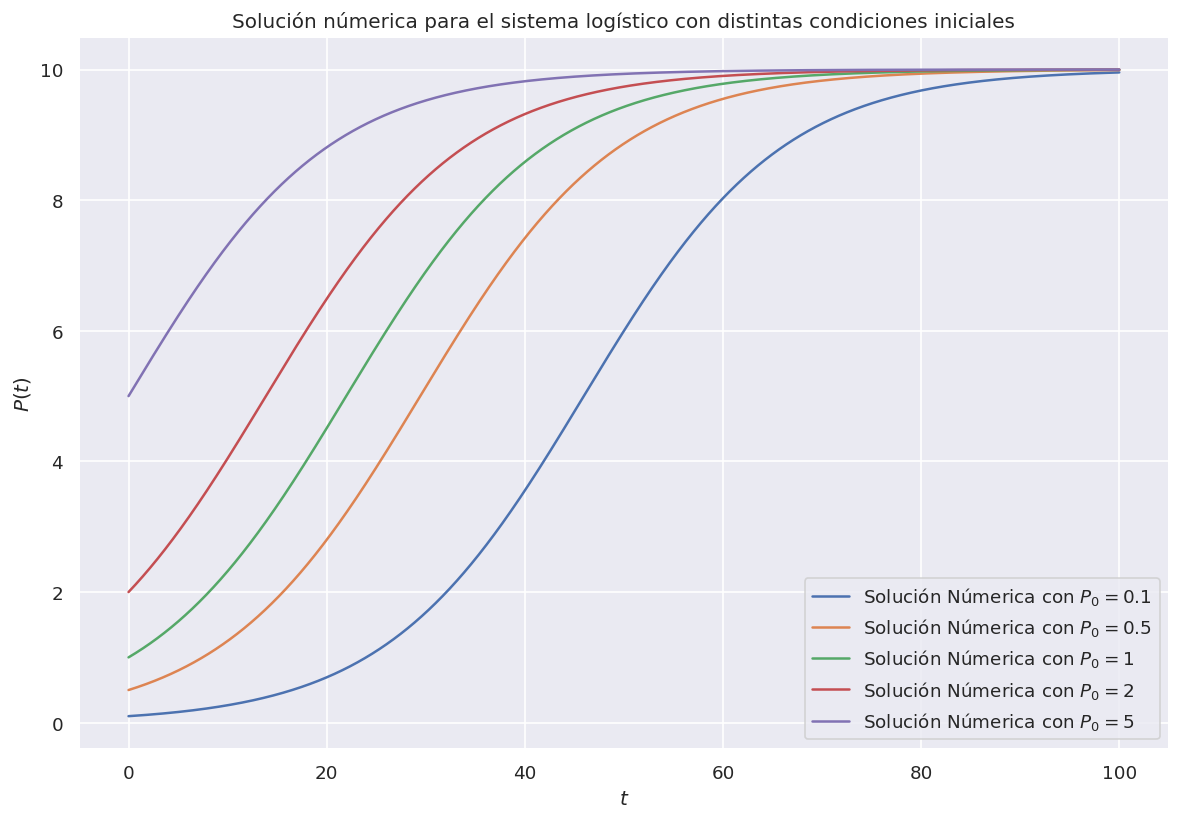

In [8]:
fig,ax = plt.subplots(1,1,figsize=(10,7),dpi=120)

# Aquí calculamos la solución númerica

for p0 in [0.1,0.5,1,2,5]:
    Y,T = euler_logistico(y0=p0,t_max = 100)
    ax.plot(T,Y,label=r'Solución Númerica con $P_{0}=$'+str(p0))

ax.set_ylabel(r'$P(t)$')
ax.set_xlabel(r'$t$')
ax.set_title('Solución númerica para el sistema logístico con distintas condiciones iniciales')
ax.legend()

fig.tight_layout()
plt.show()

Notemos que al principio parece crecer de manera exponencial pero parece que hay un punto donde el comportamiento del sistema cambia y la velocidad de crecimiento parece disminuir. La forma más sencilla de estudiar _velocidades_ es usando la derivada y para este caso ya sabemos cómo luce la derivada. Vamos a estudiar al sistema con las mismas condiciones que antes. 

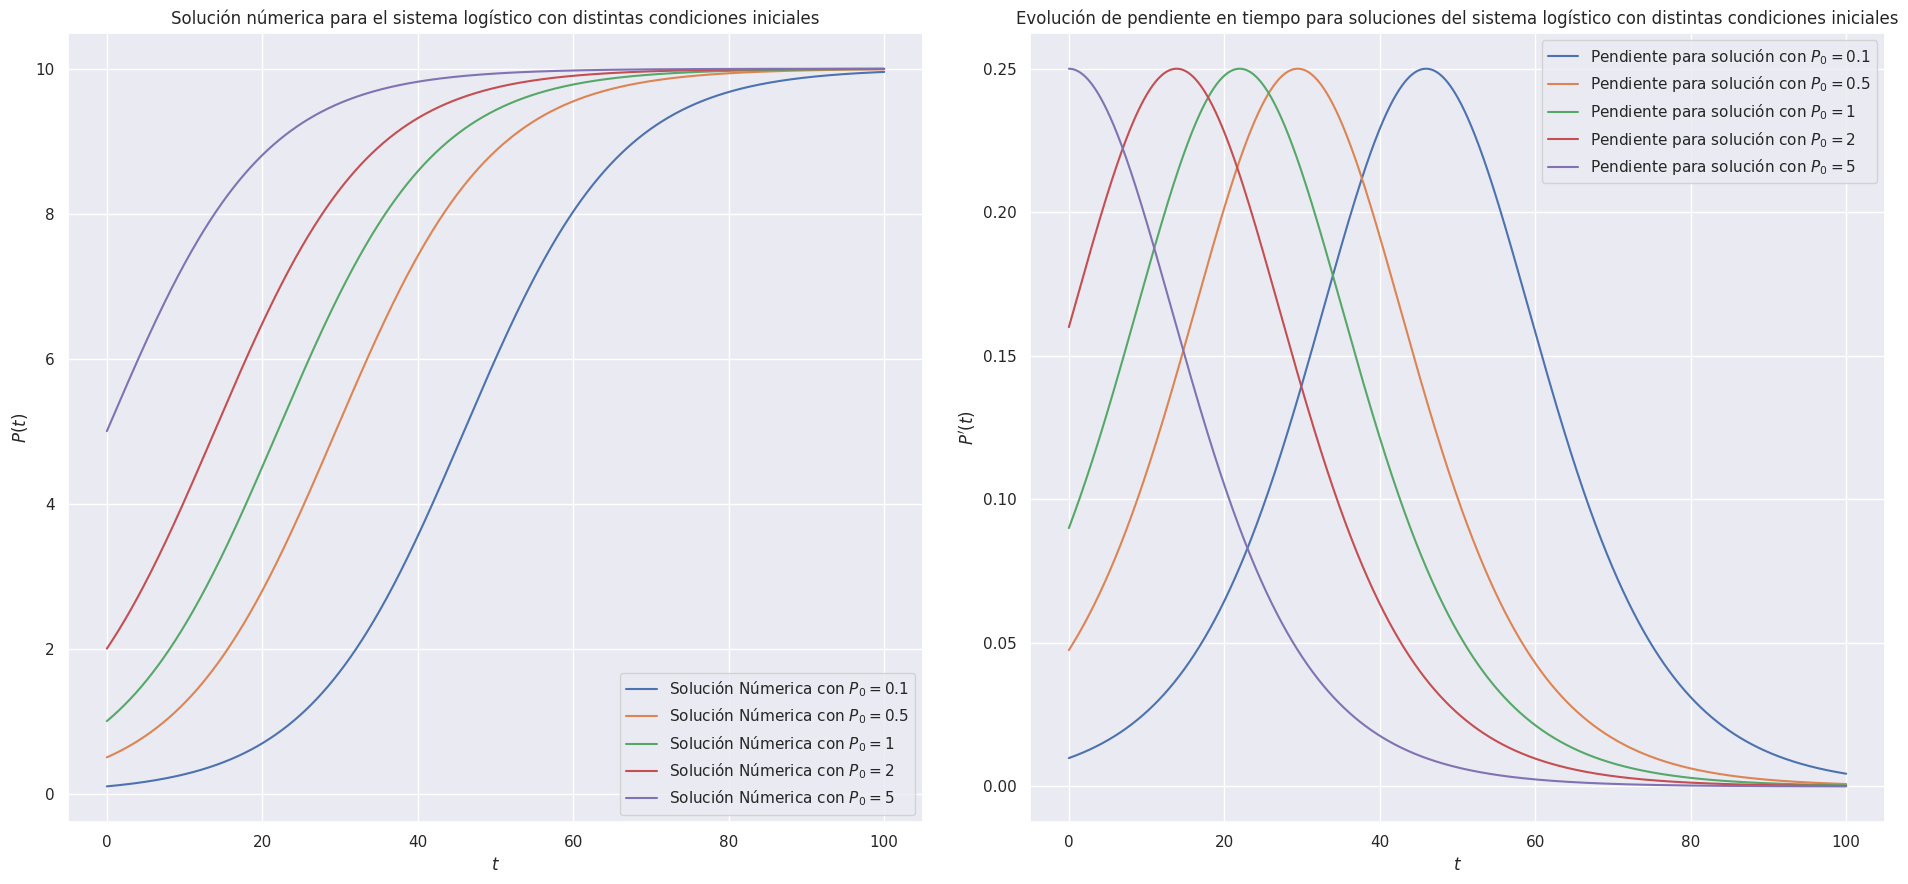

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=100)


der = lambda p: 0.1*p*(1-(p/10))
# Aquí calculamos la solución númerica
for p0 in [0.1,0.5,1,2,5]:
    Y,T = euler_logistico(y0=p0,t_max = 100)
    ax[0].plot(T,Y,label=r'Solución Númerica con $P_{0}=$'+str(p0))
    ax[1].plot(T,list(map(der,Y)),label=r'Pendiente para solución con $P_{0}=$'+str(p0))

ax[0].set_ylabel(r'$P(t)$')
ax[0].set_xlabel(r'$t$')
ax[0].set_title('Solución númerica para el sistema logístico con distintas condiciones iniciales')
ax[0].legend()

ax[1].set_ylabel(r"$P'(t)$")
ax[1].set_xlabel(r'$t$')
ax[1].set_title('Evolución de pendiente en tiempo para soluciones del sistema logístico con distintas condiciones iniciales')
ax[1].legend()

fig.tight_layout()
plt.show()

Notemos que todas las derivadas, sin importa la condición inical, tiene el mismo comportamiento (misma forma): comienzan cerca del cero, llegan a un máximo y seguido comienzan a decrecer aproximandose de nuevo al cero. 

Esta cosa de _el mismo comportamiento_ nos habla de una cosa bien intrínseca del sistema y esa es que hay un campo vectorial que rige el comportamiento del sistema. En la aproximación cualitiva al estudio de las EDOs a eso se le llama _el campo de pendientes_. Para poder visualizar vamos seleccionar un punto $(P^*,t^*)$, ahí vamos a calcular la pendiente $f(P^*,t^*)$ y trazamos una pequeña línea para denotar el valor de la pendiente ahí.

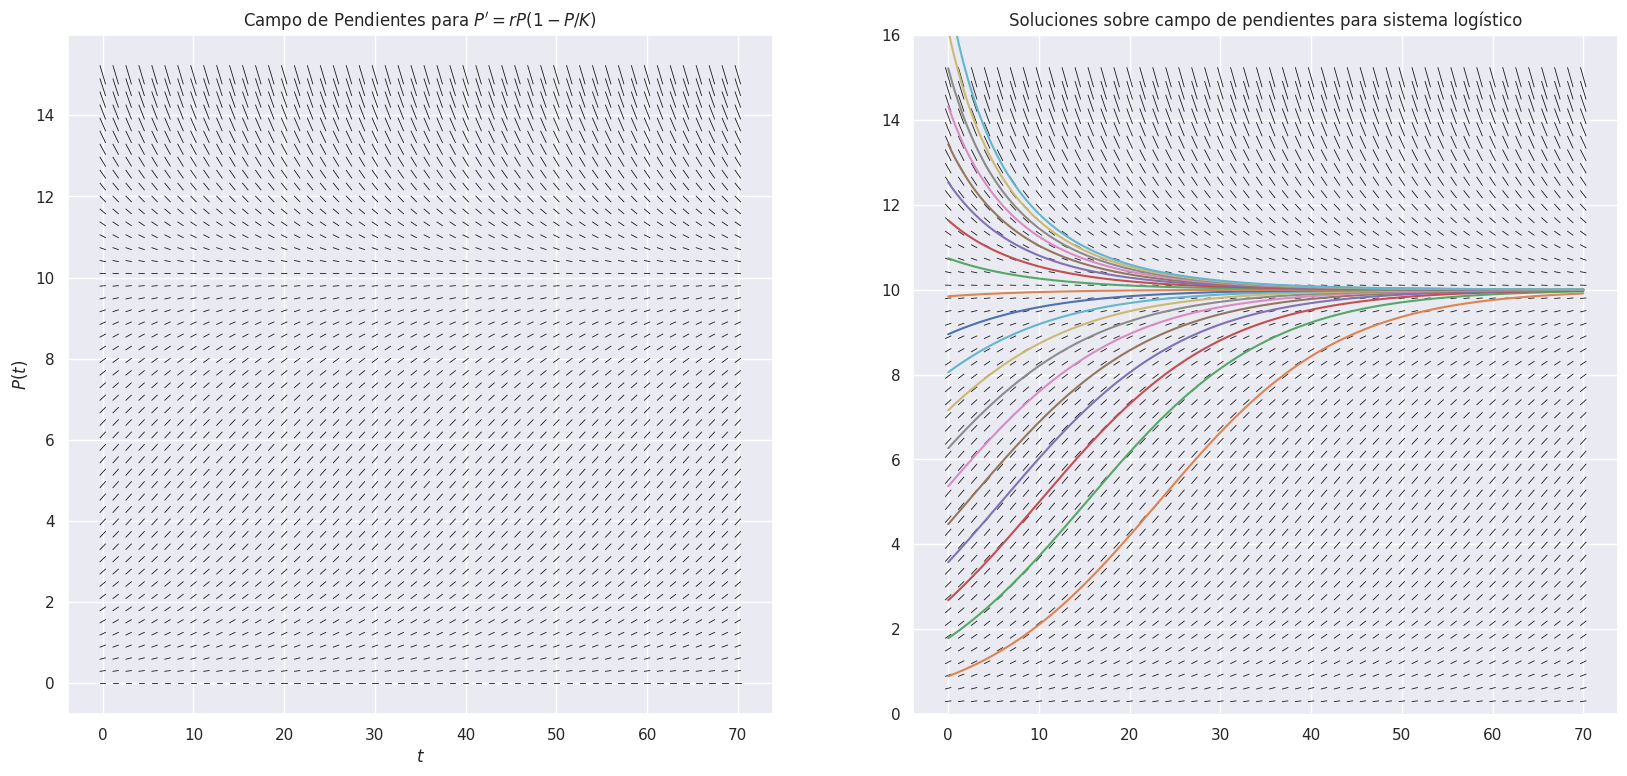

In [10]:
#NOTA: Aunque es posible realizar un función para hacer propiamente los 
#      campos de pendientes prefiero hacer una aproximación más _rústica_
#      al problema del campo de pendientes, más adelante haré una función
#      para hacer esto. Eso cuando lleguemos a sistemas de dos dimensiones

fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=100)

der = lambda t,p: 0.1*p*(1-(p/10)) 
x = np.linspace(0,70,50)
y = np.linspace(0,15,50)

for j in x:
    for k in y:
        pendiente = der(j,k)
        dominio = np.linspace(j-0.3,j+0.3,2)
        def raya(x1,y1):
            z = pendiente*(dominio-x1)+y1
            return z
        ax[0].plot(dominio,raya(j,k),solid_capstyle='projecting',solid_joinstyle='bevel',color='k',lw=0.6)
        ax[1].plot(dominio,raya(j,k),solid_capstyle='projecting',solid_joinstyle='bevel',color='k',lw=0.6)
        
for p0 in np.linspace(0,17,20):#[0.1,0.5,1,2,5,15,13]:
    Y,T = euler_logistico(y0=p0,t_max = 70)
    ax[1].plot(T,Y,label=r'Solución Númerica con $P_{0}=$'+str(p0))
    #ax[1].plot(T,list(map(der,Y)),label=r'Pendiente para solución con $P_{0}=$'+str(p0))
        
ax[0].set_title(r"Campo de Pendientes para $P'= rP(1-P/K)$")
ax[0].set_ylabel(r"$P(t)$")
ax[0].set_xlabel(r'$t$')

ax[1].set_title(r"Soluciones sobre campo de pendientes para sistema logístico")
ax[1].set_ylim(0,16)

plt.show()

Es de notar cómo el campo de pendientes nos describe cómo van a evolucionar las soluciones del sistema, simplemente podríamos trazar líneas siguiendo en campo de pendientes y sin conocer las soluciones analíticas ni númericas ya se podría saber cómo deben lucir las soluciones. 

Si miramos las pendientes en el 0 y en el 10 notaremos que las pendientes son nulas mientras que las pendientes entre 0 y 10 son positivas y mientras más nos alejamos del 0 y más nos acercamos al 10 más cercanas al cero se vuelven las pendientes, caso contrario para valores mayores a 10, conforme nos vamos acercando al 10 _por arriba_ notaremos que la pendiente que en principio era bien negativa se va acercando más al 0.

Dicho lo anterior, pareciera que todas las soluciones se alejan del infinito y del cero, y se terminan cayendo siempre en $P = 10$... ¿Por qué? Bueno, resulta que dentro los puntos fijos hay tipos, por ahora hablaremos de dos, los **puntos estables** y **puntos inestables** pero es importante que sepas que el mundo de la estabilidad no se limita a lo estable e inestable.

Diremos que un punto fijo $P^*$ es estable si $\forall x\in B_{\epsilon}(P^*)$ (para todo punto en una bola/vecindad centrada en $P^*$ con radio $\epsilon$) tomando como punto inicial del sistema a $P_0 = x$, cuando $t\to \infty$ entonces $P(t)\to P^*$. Ahora bien, diremos que es inestable si $\forall x\in B_{\epsilon}(P^*)$ cuando $t\to \infty$ entonces $P(t) \notin B_{\epsilon}(P^*)$.

Un _truco_ (**teorema**) bien interesante para poder caraterizar esos puntos es el teorema de linearización:

**Teorema:** Supongamos que tenemos el sistema $y' = f(y,t)$ con el punto fijo $y_{0}$ y donde $f(\cdot)$ es diferenciable. Entonces: 
* si $f'(y_{0})<0$ entonces $y_{0}$ es estable;
* si $f'(y_{0})>0$ entonces $y_{0}$ es inestable;
* so $f'(y_{0})=0$ entonces requerimos más información para determinar qué tipo de estabilidad tiene $y_{0}$

La verdad es que este teorema es súper poderoso. Por ejemplo, notemos que en el problema anterior 
$$
f(P,t) = rP\left(1 - \frac{P}{K}\right) 
$$
Por lo que:
$$
f'(P,t) = \frac{df}{dP} = \frac{d}{dP}\left(rP\left(1 - \frac{P}{K}\right)\right) = r\frac{d}{dP}\left(P - \frac{1}{K}P^2\right) = r - r\frac{2}{K}P
$$

Entonces 
$$
f'(0) = r -0 > 0  \; ya \; que \; r>0
$$

Por tanto $y_{0}=0$ es un punto inestable, i.e. por si nos tomaos un punto inicial en $y_{0}+\epsilon$, sin importar que tan pequeña sea esa $\epsilon$, esa solución terminará fuera del intervalo delimitado por $[y_{0}-\epsilon,y_{0}+\epsilon]$ cuando $t\to \infty$. Por otro lado:
$$
f'(K) = r - r\frac{2}{K}(K) = r -2r < 0
$$
Por tanto $P_{0}=K$ es un punto estable.

**NOTA:** Es común encontrar que a los puntos fijos estables se les refiere también como _pozos_ o _sumideros_ mientras que a los inestables se les refiere como _fuentes_ o _focos_. 

### Una última exploración al modelo logístico

Al momento ya podemos calcular los puntos fijos y además ya podemos decir si son estables, inestables o saber si necesitamos más información para determinar su estabilidad. Básicamente pareciera que ya podemos conocer toda la dinámica de un sistema y determinar el futuro o el pasado conociendo únicamente el sistema analítico y una condición inicial ¿Hay más?

Sí hay más, eso que nos falta son las bifurcaciones y para entenderlas vamos a trabajar con el crecimiento logístico como una _familia uniparamétrica_ de ecuaciones diferenciales determiandas por la ecuación generadora:

$$
P' = f_{\mu}(P) = rP\left(1 - \frac{P}{\mu}\right) 
$$

La pregunta aquí va a ser ¿Cómo cambia la estabilidad del sistema si cambiamos el valor de $\mu$? Este parámetro controla la cantidad de población máxima del sistema ¿Qué pasa si movemos ese límite? Vamos a hacer una exploración númerica, vamos a dejar fijo $r=0.1$

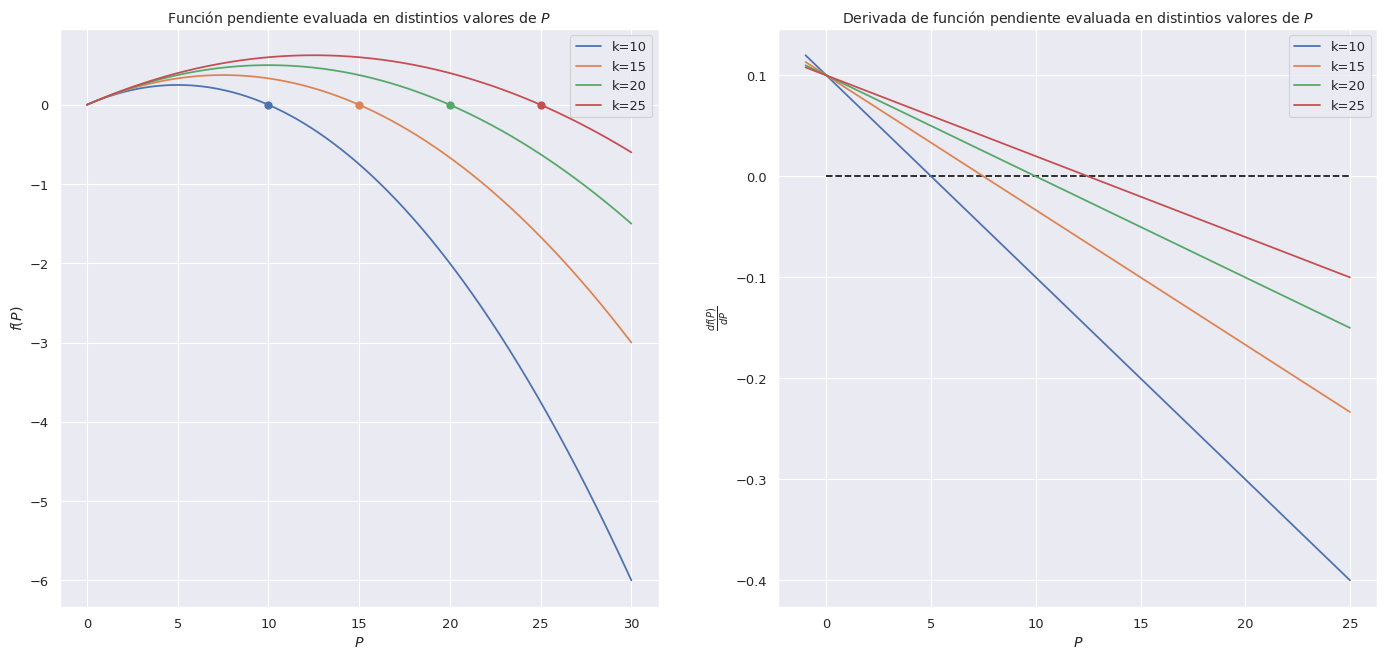

In [11]:
# Vamos a definir a la función pendiente o f(P;mu) y a su derivada f'(P;mu)

func_pend = lambda p,mu: 0.1*p*(1-(p/mu)) #función pendiente con r=0.1
func_pend_der = lambda p,mu: 0.1 - 0.1*(2/mu)*p #Derivada de función pendiente con r=0.1

# Ahora vamos a definir cuatro valores para mu
mu_vals = [10,15,20,25]

# Aquí vamos a definir un intervalo para p
P_vals_pend = np.linspace(0,30,1000)
P_vals_pend_der = np.linspace(-1,25,1000)

#Ahora defininos los plots y los ciclos para gráficar
fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=85)

for mu in mu_vals:
    dummy_pend = func_pend(P_vals_pend,mu)
    dummy_pend_der = func_pend_der(P_vals_pend_der,mu)
    
    ax[0].plot(P_vals_pend,dummy_pend,label='k='+str(mu))
    ax[0].scatter(mu,0)
    ax[1].plot(P_vals_pend_der,dummy_pend_der,label='k='+str(mu))
    

ax[0].set_xlabel(r'$P$')
ax[0].set_ylabel(r'$f(P)$')
ax[0].set_title(r"Función pendiente evaluada en distintios valores de $P$")

ax[1].set_xlabel(r'$P$')
ax[1].set_ylabel(r"$\frac{df(P)}{dP}$")
ax[1].set_title(r"Derivada de función pendiente evaluada en distintios valores de $P$")
ax[1].hlines(y=0,xmin=0,xmax=25,ls='--')

ax[0].legend()
ax[1].legend()

plt.show()

Notemos que por un lado, mover el valor de $K$ únicamente mueve el lugar donde cambia el valor de la función pendiente de ser positiva a negativa (de un crecimiento a un decrecimiento). Como se ve en las gráficas anteriores, y en especial la del plano de pendientes, cuando $P\in (0,K)$ entonces $f(P)>0$ mientras que si $P>k$ entonces $f(P)<0$. 

Por otro lado, notemos que si la derivada rápidamente se hace negativa conforme nos alejamos del $0$, con lo cual seguramos la estabilidad del punto $K$. Al hacer crecer el valor de $K$ únicamente _retrasamos_ el cambio de signo de la derivada. Sin embargo, por la forma de la derivada podemos asegurar que eventualmente se alcanzará el cambio de signo.

Hasta ahora nada que no se conozca por análisis anteriores... ¿Qué pasaría si ahora movemos únicamente el parámetro $r$ en lugar del $K$? Usaremos entonces la siguiente familia parámetrica:

$$
P'= f_{\nu}(P) = \nu P \left(1 - \frac{P}{K} \right)
$$

Para realizar la operación númerica vamos a dejar fijo el valor de $K=10$. 

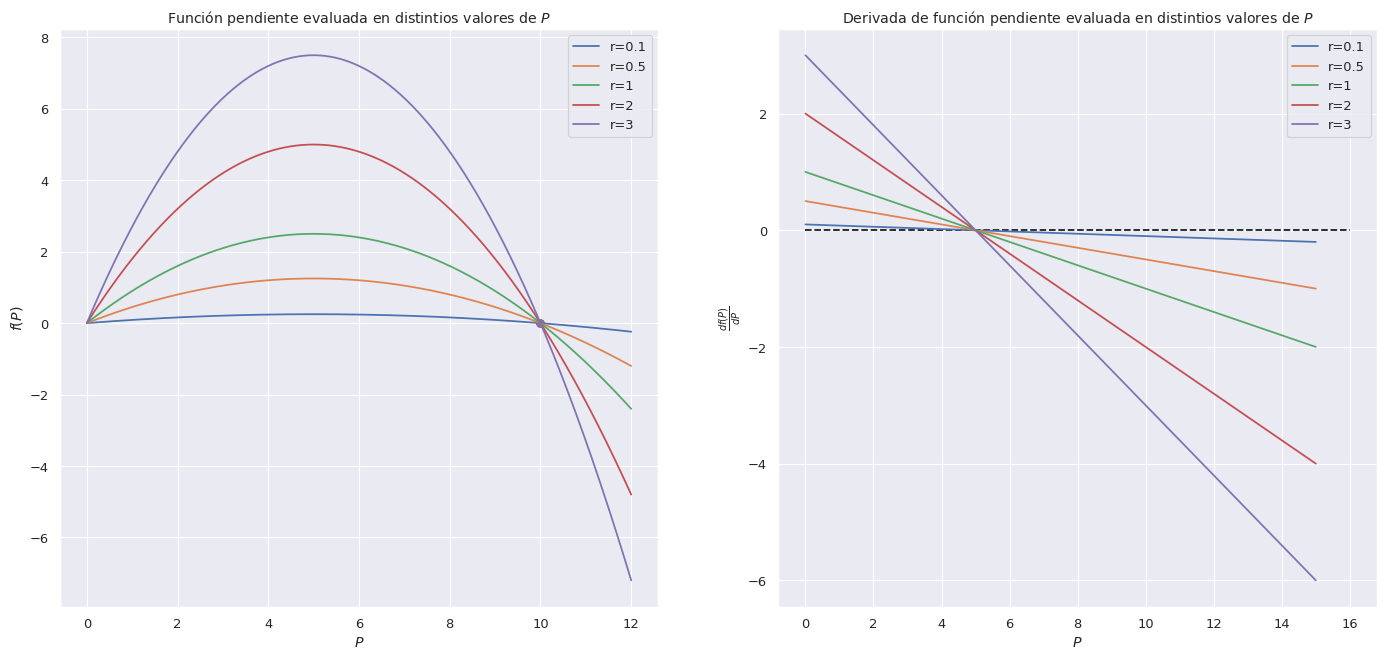

In [12]:
# Vamos a definir a la función pendiente o f(P;nu) y a su derivada f'(P;nu)

func_pend = lambda p,nu: nu*p*(1-(p/10)) #función pendiente con K = 10
func_pend_der = lambda p,nu: nu - nu*(2/10)*p #Derivada de función pendiente con K = 10

# Ahora vamos a definir cinco valores para nu
nu_vals = [0.1,0.5,1,2,3]

# Aquí vamos a definir un intervalo para p
P_vals_pend = np.linspace(0,12,1000)
P_vals_pend_der = np.linspace(0,15,1000)

#Ahora defininos los plots y los ciclos para gráficar
fig,ax = plt.subplots(1,2,figsize=(20,9),dpi=85)

for nu in nu_vals:
    dummy_pend = func_pend(P_vals_pend,nu)
    dummy_pend_der = func_pend_der(P_vals_pend_der,nu)
    
    ax[0].plot(P_vals_pend,dummy_pend,label='r='+str(nu))
    ax[0].scatter(10,0)
    ax[1].plot(P_vals_pend_der,dummy_pend_der,label='r='+str(nu))
    

ax[0].set_xlabel(r'$P$')
ax[0].set_ylabel(r'$f(P)$')
ax[0].set_title(r"Función pendiente evaluada en distintios valores de $P$")

ax[1].set_xlabel(r'$P$')
ax[1].set_ylabel(r"$\frac{df(P)}{dP}$")
ax[1].set_title(r"Derivada de función pendiente evaluada en distintios valores de $P$")
ax[1].hlines(y=0,xmin=0,xmax=16,ls='--')

ax[0].legend()
ax[1].legend()

plt.show()

Hay varias cosas que se deben notar. El primero de estos es que en la función pendiente conforme $r$ crece la distancia entre el foco y el vértice de la parábola crece; en el caso de la derivada de la función pendiente notamos que hay un cambio en la ordenada al orígen pero la raíz del polinomio no cambia (el valor de la raíz está domiada por $K$).

## Bifurcaciones

En la sección anterior se introdujo la notación de familias uniparamétricas de ecuaciones diferenciales:

$$
y' = f_{\mu}(y) = f(y,t;\mu)
$$

En el sistema anterior analizamos cómo variar un parámetro cambia el comportamiento de las soluciones. Esto último deriva del estudio de la función pendiente y su derivada. 

En esta sección vamos a estudiar de manera breve dos familias uniparamétricas. Vamos con el primero:

$$
y' = f_{\mu}(y) = y^2 -2y + \mu
$$

¿Dónde se anula esta función pendiente?

$$
\begin{eqnarray}
f_{\mu}(y) &=& y^2 -2y + \mu = 0 \\
\\
\implies y &=& \displaystyle\frac{2 \pm \sqrt{4 - 4\mu} }{2} \\
&=& 1 \pm \displaystyle\sqrt{1 - \mu}
\end{eqnarray}
$$

Notemos que solamente hay soluciones reales si $1 - \mu \ge 0$ con lo cual tenemos entonces dos puntos fijos si $\mu \le 1$